In [1]:
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
train= pd.read_csv('dataset/staff.csv')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Doctor
0,1,8,c,3,Z,3,radiotherapy,R,F,Dr. Gundalli
1,2,2,c,5,Z,2,radiotherapy,S,F,Dr. Gundalli
2,3,10,e,1,X,2,anesthesia,S,E,Dr. Vinay
3,4,26,b,2,Y,2,radiotherapy,R,D,Dr. Gundalli
4,5,26,b,2,Y,2,radiotherapy,S,D,Dr. Gundalli


In [3]:
train.shape

(19, 10)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   case_id                            19 non-null     int64 
 1   Hospital_code                      19 non-null     int64 
 2   Hospital_type_code                 19 non-null     object
 3   City_Code_Hospital                 19 non-null     int64 
 4   Hospital_region_code               19 non-null     object
 5   Available Extra Rooms in Hospital  19 non-null     int64 
 6   Department                         19 non-null     object
 7   Ward_Type                          19 non-null     object
 8   Ward_Facility_Code                 19 non-null     object
 9   Doctor                             19 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


In [5]:
train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital
count,19.000000,19.000000,19.000000,19.000000
mean,10.000000,17.368421,5.000000,2.736842
std,5.627314,10.366669,2.848001,0.991189
min,1.000000,1.000000,1.000000,1.000000
25%,5.500000,8.500000,2.500000,2.000000
50%,10.000000,22.000000,5.000000,2.000000
75%,14.500000,26.000000,6.000000,4.000000
max,19.000000,32.000000,10.000000,4.000000


In [6]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Doctor                               0
dtype: int64

In [7]:
#train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
#train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [8]:
train.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Doctor                               0
dtype: int64

In [9]:
train.drop(['case_id', 'Available Extra Rooms in Hospital'], axis=1, inplace=True)

In [10]:
cat_cols=[]
num_cols=[]
for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Doctor']
['Hospital_code', 'City_Code_Hospital']


In [11]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Doctor
0,8,c,3,Z,radiotherapy,R,F,Dr. Gundalli
1,2,c,5,Z,radiotherapy,S,F,Dr. Gundalli
2,10,e,1,X,anesthesia,S,E,Dr. Vinay
3,26,b,2,Y,radiotherapy,R,D,Dr. Gundalli
4,26,b,2,Y,radiotherapy,S,D,Dr. Gundalli


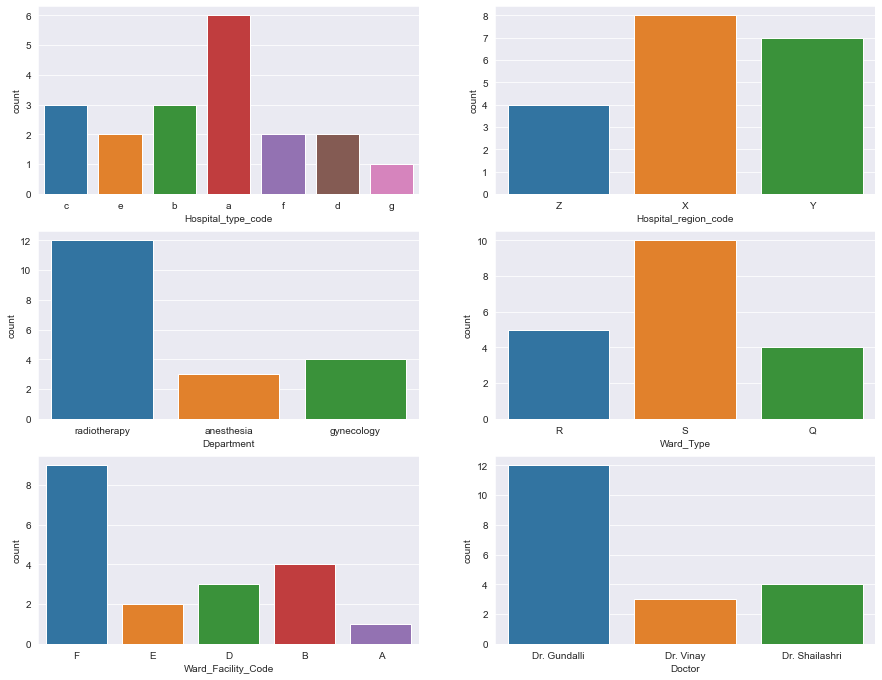

In [12]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

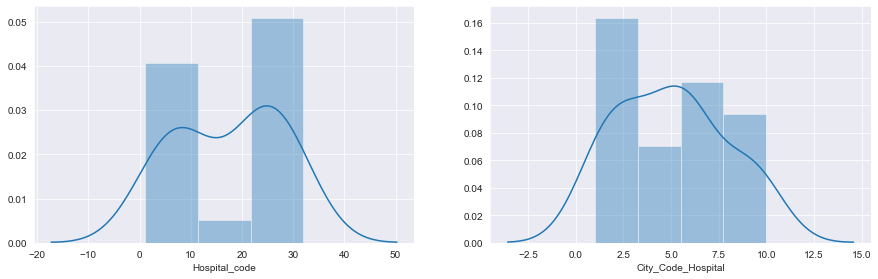

In [13]:
i=1
plt.figure(figsize=(15,20))
for col in num_cols:
    plt.subplot(4,2,i)
    sns.distplot(train[col])
    i=i+1
plt.show()

In [14]:
train['Doctor']

0       Dr. Gundalli
1       Dr. Gundalli
2          Dr. Vinay
3       Dr. Gundalli
4       Dr. Gundalli
5          Dr. Vinay
6       Dr. Gundalli
7       Dr. Gundalli
8     Dr. Shailashri
9     Dr. Shailashri
10      Dr. Gundalli
11      Dr. Gundalli
12      Dr. Gundalli
13      Dr. Gundalli
14    Dr. Shailashri
15    Dr. Shailashri
16      Dr. Gundalli
17         Dr. Vinay
18      Dr. Gundalli
Name: Doctor, dtype: object

In [15]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Doctor']

In [16]:
cat_cols.remove('Doctor')

In [17]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code']

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_cols.append('City_Code_Hospital')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [19]:
from joblib import dump
dump(le, 'le_encoder_staff.bin')

['le_encoder_staff.bin']

In [20]:
train[cat_cols]

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,City_Code_Hospital
0,2,2,2,1,4,2
1,2,2,2,2,4,4
2,4,0,0,2,3,0
3,1,1,2,1,2,1
4,1,1,2,2,2,1
5,0,0,0,2,4,5
6,5,1,2,2,1,6
7,0,0,2,0,4,5
8,3,1,1,1,1,7
9,4,0,1,2,3,0


In [21]:
train['City_Code_Hospital'].value_counts()

5    5
6    3
1    3
4    2
2    2
0    2
7    1
3    1
Name: City_Code_Hospital, dtype: int64

In [22]:
num_cols

['Hospital_code', 'City_Code_Hospital']

In [23]:
num_cols.remove('City_Code_Hospital')
# num_cols.remove('Bed Grade')
num_cols

['Hospital_code']

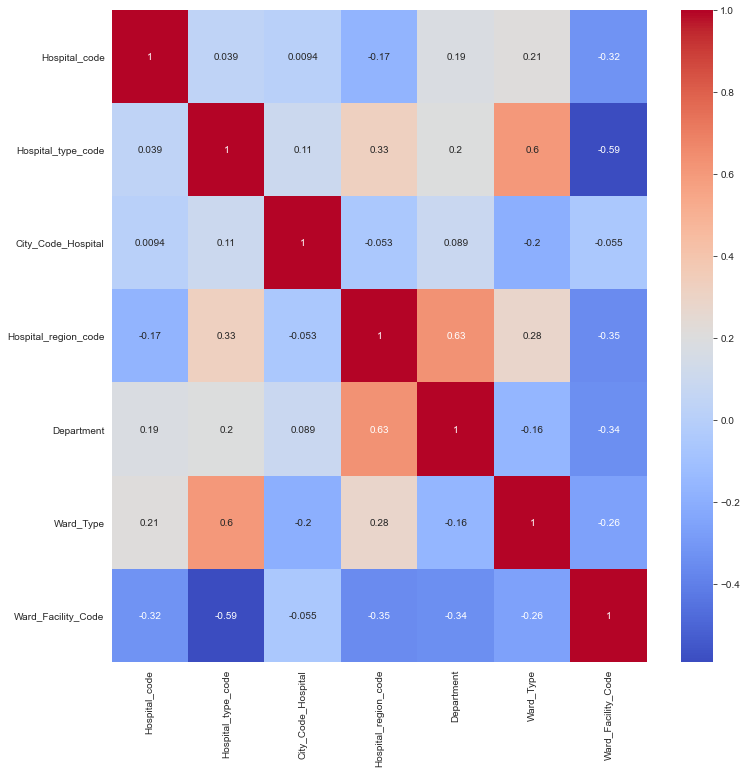

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [25]:
print(train.shape)
train.head()

(19, 8)


,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Doctor
0,8,2,2,2,2,1,4,Dr. Gundalli
1,2,2,4,2,2,2,4,Dr. Gundalli
2,10,4,0,0,0,2,3,Dr. Vinay
3,26,1,1,1,2,1,2,Dr. Gundalli
4,26,1,1,1,2,2,2,Dr. Gundalli


In [26]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
train[num_cols]= ss.fit_transform(train[num_cols].values)

In [27]:
dump(ss, 'std_scaler_staff.bin')

['std_scaler_staff.bin']

In [28]:
train[num_cols].head(5)

,Hospital_code
0,-0.928470
1,-1.523107
2,-0.730257
3,0.855444
4,0.855444


In [29]:
from sklearn.model_selection import train_test_split
y= train[['Doctor']]
X= train.drop(['Doctor'], axis=1)

In [30]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code
0,-0.928470,2,2,2,2,1,4
1,-1.523107,2,4,2,2,2,4
2,-0.730257,4,0,0,0,2,3
3,0.855444,1,1,1,2,1,2
4,0.855444,1,1,1,2,2,2


In [31]:
y.head()

,Doctor
0,Dr. Gundalli
1,Dr. Gundalli
2,Dr. Vinay
3,Dr. Gundalli
4,Dr. Gundalli


In [32]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [33]:
print(f'The shape of X_Train - {X_train.shape}')
print(f'The shape of X_test - {X_test.shape}')
print(f'The shape of y_train - {y_train.shape}')
print(f'The shape of y_test - {y_test.shape}')

The shape of X_Train - (15, 7)
The shape of X_test - (4, 7)
The shape of y_train - (15, 1)
The shape of y_test - (4, 1)


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
xgb = XGBClassifier(n_estimators=50)
xgb.fit(X_train, y_train)

[22:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
dump(xgb, 'classsifier_staff.bin')

['classsifier_staff.bin']

In [37]:
y_pred= xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.75
[[2 0 0]
 [0 1 0]
 [0 1 0]]
                precision    recall  f1-score   support

  Dr. Gundalli       1.00      1.00      1.00         2
Dr. Shailashri       0.50      1.00      0.67         1
     Dr. Vinay       0.00      0.00      0.00         1

      accuracy                           0.75         4
     macro avg       0.50      0.67      0.56         4
  weighted avg       0.62      0.75      0.67         4



In [38]:
test= pd.read_csv('dataset/staff.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Doctor
0,1,8,c,3,Z,3,radiotherapy,R,F,Dr. Gundalli
1,2,2,c,5,Z,2,radiotherapy,S,F,Dr. Gundalli
2,3,10,e,1,X,2,anesthesia,S,E,Dr. Vinay
3,4,26,b,2,Y,2,radiotherapy,R,D,Dr. Gundalli
4,5,26,b,2,Y,2,radiotherapy,S,D,Dr. Gundalli


In [39]:
test.shape

(19, 10)

In [40]:
test.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Doctor                               0
dtype: int64

In [41]:
#test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   case_id                            19 non-null     int64 
 1   Hospital_code                      19 non-null     int64 
 2   Hospital_type_code                 19 non-null     object
 3   City_Code_Hospital                 19 non-null     int64 
 4   Hospital_region_code               19 non-null     object
 5   Available Extra Rooms in Hospital  19 non-null     int64 
 6   Department                         19 non-null     object
 7   Ward_Type                          19 non-null     object
 8   Ward_Facility_Code                 19 non-null     object
 9   Doctor                             19 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB


In [43]:
test.drop(['case_id', 
           'Available Extra Rooms in Hospital', 
           'Doctor'], axis=1, inplace=True
         )

In [44]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'City_Code_Hospital']

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Hospital_code         19 non-null     int64 
 1   Hospital_type_code    19 non-null     object
 2   City_Code_Hospital    19 non-null     int64 
 3   Hospital_region_code  19 non-null     object
 4   Department            19 non-null     object
 5   Ward_Type             19 non-null     object
 6   Ward_Facility_Code    19 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB


In [46]:
print(cat_cols)
for col in cat_cols:
    test[col]= le.fit_transform(test[col])

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'City_Code_Hospital']


In [47]:
test[num_cols]= ss.transform(test[num_cols].values)

In [48]:
test

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code
0,-0.928470,2,2,2,2,1,4
1,-1.523107,2,4,2,2,2,4
2,-0.730257,4,0,0,0,2,3
3,0.855444,1,1,1,2,1,2
4,0.855444,1,1,1,2,2,2
5,0.558125,0,5,0,0,2,4
6,1.450082,5,6,1,2,2,1
7,0.558125,0,5,0,2,0,4
8,-1.622214,3,7,1,1,1,1
9,-0.730257,4,0,0,1,2,3


In [49]:
predictions= xgb.predict(test)

In [50]:
np. set_printoptions(threshold=np. inf)
print(predictions)

['Dr. Gundalli' 'Dr. Gundalli' 'Dr. Shailashri' 'Dr. Gundalli'
 'Dr. Gundalli' 'Dr. Vinay' 'Dr. Gundalli' 'Dr. Gundalli' 'Dr. Shailashri'
 'Dr. Shailashri' 'Dr. Gundalli' 'Dr. Gundalli' 'Dr. Gundalli'
 'Dr. Gundalli' 'Dr. Shailashri' 'Dr. Shailashri' 'Dr. Gundalli'
 'Dr. Vinay' 'Dr. Gundalli']


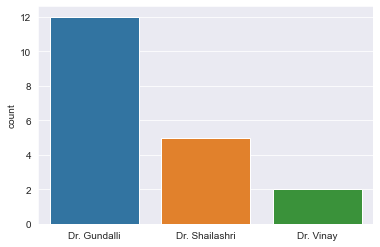

In [51]:
sns.countplot(predictions)

In [52]:
# Training Samples
temp = pd.read_csv('dataset/test_data.csv')
temp.head().T

,0,1,2,3,4
case_id,318439,318440,318441,318442,318443
Hospital_code,21,29,26,6,28
Hospital_type_code,c,a,b,a,b
City_Code_Hospital,3,4,2,6,11
Hospital_region_code,Z,X,Y,X,X
Available Extra Rooms in Hospital,3,2,3,3,2
Department,gynecology,gynecology,gynecology,gynecology,gynecology
Ward_Type,S,S,Q,Q,R
Ward_Facility_Code,A,F,D,F,F
Bed Grade,2,2,4,2,2


In [53]:
temp.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
dtype: object